[[[[0.12452208 0.21142337 0.29978287 ... 0.22375001 0.16156915
    0.11298115]
   [0.21411061 0.28394356 0.38105115 ... 0.26574406 0.22109668
    0.18644829]
   [0.2796665  0.34228632 0.42031762 ... 0.26683536 0.24589743
    0.23907308]
   ...
   [0.15112899 0.16764826 0.20435067 ... 0.02577832 0.02343907
    0.02437388]
   [0.12519078 0.15172455 0.2041238  ... 0.02249475 0.02171167
    0.02548931]
   [0.09748345 0.14948627 0.21416634 ... 0.0243274  0.02713308
    0.02653959]]]


 [[[0.03468464 0.0343846  0.03444654 ... 0.02294828 0.02332789
    0.02594497]
   [0.03567836 0.03033857 0.03174517 ... 0.01820465 0.01875114
    0.02244023]
   [0.03152188 0.02758832 0.030463   ... 0.01582741 0.01610189
    0.0185382 ]
   ...
   [0.02529302 0.0234086  0.02478522 ... 0.0166556  0.01629843
    0.02090469]
   [0.02501812 0.02155963 0.02237495 ... 0.01511039 0.01590526
    0.02239464]
   [0.02822103 0.02634744 0.02453822 ... 0.0195393  0.02352789
    0.02506634]]]


 [[[0.13315217 0.21709602 0.28

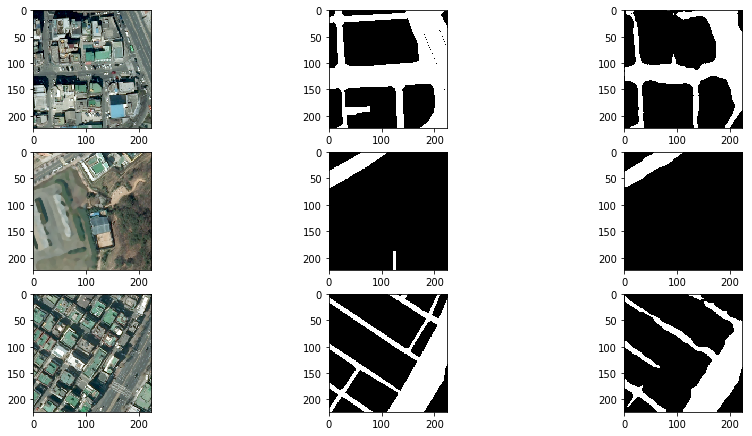

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as Funct
import sys
from collections import OrderedDict
import segData
from PIL import Image
from torchvision.transforms import ToPILImage
import torchvision.transforms as t
to_img = t.ToPILImage()
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"

if __name__ == "__main__":
    from Unet import Unet
    from Unet import ConvBlock
    from Unet import First_ConvBlock
    from Unet import Get_Sample
    from Unet import Up_Block
    from Unet import First_ConvBlock
    import torch.optim as optim
    from torch.autograd import Variable
    from torch.utils.data import DataLoader
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    def norm(x):
        return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))
    
    test_loader = segData.DataS("val")
    test_dataset = DataLoader(
        segData.DataS("val"),
        batch_size=4, shuffle=False, num_workers=4)    
    dataiter = iter(test_dataset)
    inputs, labels = dataiter.next()
    
    model = torch.load('1_epoch_model.pt')
    
    inputs = inputs.cuda()
    outputs = model(Variable(inputs))
    inputs = inputs.cpu().numpy()
    inputs = np.transpose(inputs,(0, 2, 3, 1))

    labels = labels.numpy()
    labels = np.transpose(labels,(0, 2, 3, 1))
    labels = 255 * labels

    outputs = (outputs.data).cpu().numpy()
    outputs = np.transpose(outputs,(0, 2, 3, 1))
    outputs = 255 * outputs

    fig = plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(431 + 3 * i)
        plt.imshow(inputs[i], interpolation='nearest')        
        plt.subplot(432 + 3 * i)
        label = to_img(labels[i])   
        plt.imshow(label,interpolation='nearest', cmap = "gray")        
        plt.subplot(433 + 3 * i)
        output = to_img(outputs[i]) 
        plt.imshow(np.array(output), interpolation='nearest', cmap = "gray")
    plt.show()